In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import joblib
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

In [5]:
df = pd.read_csv('cleaned_census.csv')
df.head(1)

,Unnamed: 0,nchild,nchild_under_5,nsibs,eldch,sex,age,occ1950,ed_group_h
0,0,0,0,0,0,Male,43,Operative and kindred workers (nec),1


In [6]:
df = df.drop(labels=['Unnamed: 0','ed_group_h',], axis=1)


In [7]:
df['occ1950'] = np.where((df['occ1950'] == 'N/A (blank)'),
                           float('nan'), df['occ1950'])

df['occ1950'] = np.where((df['occ1950'] == 'Occupation missing/unknown'),
                           float('nan'), df['occ1950'])
df = df.dropna()

In [8]:
dummies =  pd.get_dummies(df.occ1950)

In [9]:
census = pd.concat([df, dummies], axis='columns')
census

,nchild,nchild_under_5,nsibs,eldch,sex,age,occ1950,Accountants and auditors,Actors and actresses,Advertising agents and salesmen,...,"Tinsmiths, coppersmiths, and sheet metal workers","Tool makers, and die makers and setters",Truck and tractor drivers,Upholsterers,"Ushers, recreation and amusement",Veterinarians,Waiters and waitresses,Watchmen (crossing) and bridge tenders,"Weavers, textile",Welders and flame cutters
0,0,0,0,0,Male,43,Operative and kindred workers (nec),0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,Male,28,"Managers, officials, and proprietors (nec)",0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,15,Male,36,Foremen (nec),0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,Male,48,"Managers, officials, and proprietors (nec)",0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,0,2,Male,27,Salesmen and sales clerks (nec),0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188046,0,0,0,0,Male,53,Foremen (nec),0,0,0,...,0,0,0,0,0,0,0,0,0,0
188047,0,0,0,0,Male,67,Clergymen,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188048,2,0,0,7,Male,37,"Buyers and dept heads, store",0,0,0,...,0,0,0,0,0,0,0,0,0,0
188049,6,3,0,11,Male,29,"Dispatchers and starters, vehicle",0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
census = census.drop(labels=['occ1950','Milliners' ], axis='columns')
census

,nchild,nchild_under_5,nsibs,eldch,sex,age,Accountants and auditors,Actors and actresses,Advertising agents and salesmen,Aeronautical-Engineers,...,"Tinsmiths, coppersmiths, and sheet metal workers","Tool makers, and die makers and setters",Truck and tractor drivers,Upholsterers,"Ushers, recreation and amusement",Veterinarians,Waiters and waitresses,Watchmen (crossing) and bridge tenders,"Weavers, textile",Welders and flame cutters
0,0,0,0,0,Male,43,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,Male,28,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,15,Male,36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,Male,48,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,0,2,Male,27,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188046,0,0,0,0,Male,53,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188047,0,0,0,0,Male,67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188048,2,0,0,7,Male,37,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188049,6,3,0,11,Male,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
x = census.reset_index().values
x[0]

array([0, 0, 0, 0, 0, 'Male', 43, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [65]:
kmodes_cao = KModes(n_clusters=4, init='Cao', verbose=1)
kmodes_cao.fit_predict(x)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 24935, cost: 576917.0
Run 1, iteration: 2/100, moves: 0, cost: 576917.0


array([0, 0, 0, ..., 3, 2, 0], dtype=uint16)

In [67]:
clusters = kmodes_cao.labels_
census['clusters'] = clusters

In [68]:
census.to_csv('clustered_census_kp_PCA2.csv')

In [70]:
from sklearn.externals import joblib

joblib.dump(kmodes_cao, "model_PCA2.pkl")

['model_PCA2.pkl']

In [17]:
classifier = joblib.load("model_PCA2.pkl")

obs = x[0]
obs = np.asanyarray(obs)

In [18]:
classifier.predict([obs])

AxisError: axis 1 is out of bounds for array of dimension 0

In [34]:
from sklearn.decomposition import PCA
pca = PCA(2)
df.to_csv('clustered_census_kp_PCA.csv')

In [31]:
#Turn the modified census into two columns with PCA
plot_columns = pca.fit_transform(df.iloc[:,0:6])

ValueError: could not convert string to float: 'Male'

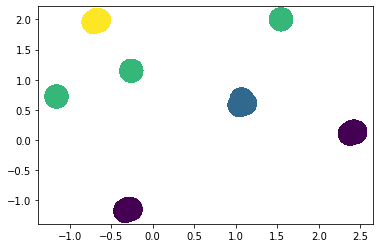

In [26]:
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=census["clusters"], s=500)
plt.show()